In [6]:
import matplotlib.pyplot as plt;
import numpy as np
def standardplot(xl,yl,ti):
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(ti)
    plt.grid(lw = 0.5)

# Numerical solution to Burgers equation

https://en.wikipedia.org/wiki/Burgers%27_equation.

$$
u_t + \frac{1}{2}(u^2)_x=\epsilon u_{xx} \text{ , } -1<x<1 \text{ , } t>0 
$$
with known boundaries $u(-1,t), u(1,t)$ and $u(x,0)$

The solution method is based on Finite Difference discretization. The function inputs are

- x: $x$ vector
- t: time vector
- eps: $\epsilon$ (constant)
- U0, UN, Ut0: $u(-1,t), u(1,t) , u(x,0)$

In [7]:
def juicy_burger(x,t,eps,U0,UN,Ut0):

    M,N = len(t), len(x)
    dt  = t[1]-t[0]
    dx  = x[1]-x[0]
    
    U = np.zeros((len(x),len(t)))
    F = np.zeros((len(x),len(t)))
    
    U[:,0]      = Ut0
    U[0,:]      = U0
    U[-1,:]     = UN
    F[:,0]      = (U[:,0]**2)/2

    mu1 = 1
    mu2 = 0.5*dt/dx
    mu3 = (dt*eps)/ (dx**2) 
    n,j = 1,1
    for n in range(1,len(t)):
        for j in range(1,len(x)-1):
            term1   = mu1*U[j,n-1]
            term2   = mu2*( F[j+1,n-1] -F[j-1,n-1] )
            term3   = mu3*( U[j-1,n-1] -2*U[j,n-1] + U[j+1,n-1] )
            
            U[j,n] = term1 - term2 + term3
        F[:,n] = (U[:,n]**2)/2
        
    return t,x,U 

## Example
$$
u(-1,t)=g(-1,t) \\
u(1,t)=g(-1,t) \\
u(x,0)=g(x,0)
$$
with
$$g(x,t)  = -tanh \left( \frac{x+0.5-t}{2\epsilon} \right) $$

(This problem has a solution $u(x,t)=g(x,t)$ which we can use to compare the results of the numverical implementation)

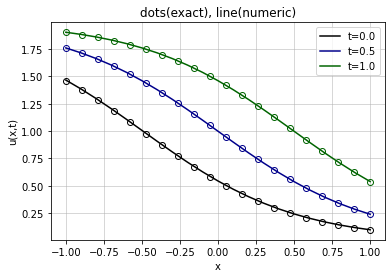

In [8]:
def u(x,t):
    # true solution used to generate boundary functions 
    inp = (x + 0.5-t)/(2*eps)
    return -np.tanh(inp)+1

eps = 0.5
M,N = 150,20
t = np.linspace(0,1,M+1)
x = np.linspace(-1,1,N+1)

Ut0     = u(x,0)
U0      = u(-1,t)
UN      = u(1,t)

run = juicy_burger(x,t,eps,U0,UN,Ut0)
U = run[2]

color = ["black", "darkblue", "darkgreen"]
x_tru = np.linspace(-1,1,20)
plt.clf()
plt.plot(x,U[:,1],color=color[0],label="t="+str(t[0]))
plt.plot(x_tru,u(x_tru,t[0]),"o",markerfacecolor="none",color=color[0])
 
plt.plot(x,U[:,int(M/2)],color=color[1],label="t="+str(t[int(M/2)]))
plt.plot(x_tru,u(x_tru,t[int(M/2)]),"o",markerfacecolor="none",markeredgecolor=color[1])

plt.plot(x,U[:,-1],color=color[2],label="t="+str(t[-1]))
plt.plot(x_tru,u(x_tru,t[-1]),"o",markerfacecolor="none",color=color[2])
standardplot("x", "u(x,t)", "dots(exact), line(numeric)")
plt.legend()